## This notebook is based on another iteration of dataset that breaks down the animation genre in a more reliable manner.

This made the animation genre into a more reliable dataset and it was soon included in the list of most prolific and profitable genres.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set(style = 'darkgrid')
%matplotlib inline

In [2]:
df = pd.read_csv('../data/profit_data.csv')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# creating columns for revenue rations and foreign gross

df['foreign_gross'] = df.worldwide_gross - df.domestic_gross
df['rev2bud_dom'] = df.domestic_gross/df.production_budget
df['rev2bud_for'] = df.foreign_gross/df.production_budget
df['rev2bud_wld'] = df.worldwide_gross/df.production_budget

In [4]:
# stripping the directors column and making primary director column

directors = df.directors.str.split(',', expand = True)
df['main_director'] = directors[0]
df['rev2bud_int'] = df.worldwide_gross/df.production_budget
df['popularity_z'] = df.popularity.apply(lambda x: (x-df.popularity.mean())/(df.popularity.std()))
df['rating_z_IMDB'] = df.avg_rating_imdb.apply(lambda x: (x-df.avg_rating_imdb.mean())/(df.avg_rating_imdb.std()))


In [5]:
#sort by the new column 'new_genre' and find the highest grossing genres

df.groupby(['new_genre']).worldwide_gross.mean()

new_genre
Action          269.421377
Adventure       229.096579
Animation       382.536625
Biography        85.373158
Comedy           81.381042
Crime            65.659048
Documentary      41.268000
Drama            84.302857
Family         1259.200000
Fantasy          56.125000
Horror           94.401563
Mystery         237.663333
Romance         126.930000
Sci-Fi            8.990000
Name: worldwide_gross, dtype: float64

##### The family category is just based off of one movie "The Beauty and the Beast". Not indicative of the genre

In [6]:
# count the entries for each genre

df['new_genre'].value_counts()

Action         385
Comedy         240
Drama          175
Biography       95
Animation       80
Adventure       76
Horror          64
Crime           63
Documentary      5
Fantasy          4
Mystery          3
Sci-Fi           1
Romance          1
Family           1
Name: new_genre, dtype: int64

In [7]:
horror_df = df[(df['primary_genre'] == 'Horror')]
action_df = df[(df['primary_genre'] == 'Action')]
drama_df = df[(df['primary_genre'] == 'Drama')]
advent_df = df[df['primary_genre'] == 'Adventure']
comedy_df = df[(df['primary_genre'] == 'Comedy')]
bio_df = df[(df['primary_genre'] == 'Biography')]
ani_df = df[(df['primary_genre'] == 'Animation')]

In [8]:
dirdf = df[['new_genre','title', 'worldwide_gross', 'rev2bud_int', 'rev2bud_dom', 'domestic_gross', 'rating_z_IMDB', 'popularity_z', 'production_budget', 'main_director']]


In [9]:
# Select top 7 genres with highest worldwide grossing
top7 = dirdf.groupby('new_genre')['worldwide_gross', 'domestic_gross', 'production_budget']\
.mean().sort_values(by = 'worldwide_gross', ascending = False)[1:10]
top7 = top7[(top7.index != 'Mystery') & ((top7.index != 'Romance'))]

In [10]:
#print(top7_subdf)
print(top7)

           worldwide_gross  domestic_gross  production_budget
new_genre                                                    
Animation       382.536625      139.504875          97.687500
Action          269.421377       98.334026          88.632727
Adventure       229.096579       84.335395          75.843421
Horror           94.401563       46.140313          13.138281
Biography        85.373158       43.554105          25.586000
Drama            84.302857       38.009829          24.454343
Comedy           81.381042       45.310042          26.755083


In [11]:
# For these movies, get average IMDB rating and TMDB popularity scores. 
top7_genres = top7.index
top7_subdf = dirdf[dirdf.new_genre.isin(top7_genres)].groupby('new_genre')['rating_z_IMDB', 'popularity_z'].mean()
# Merge datasets
top7 = top7.join(top7_subdf)
top7 = top7.reset_index()



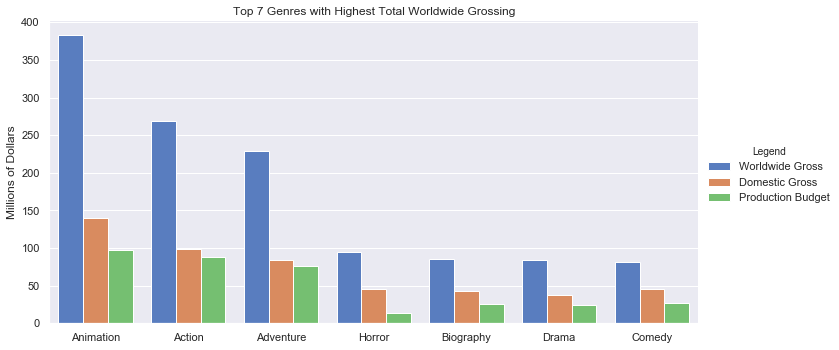

In [12]:
tmp = pd.melt(top7, id_vars=['new_genre'], value_vars=['worldwide_gross', 'domestic_gross', 'production_budget'])


g = sns.catplot(x="new_genre", y="value", hue="variable", data=tmp, kind="bar", palette="muted", aspect = 2.)
g.set_xticklabels()
g.set(title = "Top 7 Genres with Highest Total Worldwide Grossing",xlabel = '' ,ylabel = "Millions of Dollars")
new_title = 'Legend'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Worldwide Gross', 'Domestic Gross','Production Budget']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)




In [13]:
df['thrice'] = df['worldwide_gross'] >= 3*df.production_budget
df.tail()

,Unnamed: 0,popularity,vote_count,id_x,adult,original_language,title,vote_average,overview,MPAA,year,month,studio,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,avg_rating_imdb,num_votes_imdb,actors,directors,producers,editors,writers,primary_genre,secondary_genre,new_genre,worldwide_gross_z,domestic_gross_z,foreign_gross,rev2bud_dom,rev2bud_for,rev2bud_wld,main_director,rev2bud_int,popularity_z,rating_z_IMDB,thrice
1188,3421,15.931,389,523172,False,en,late night,6.6,A legendary late-night talk show host's world ...,NaN,2019,1,NaN,4.0,0.25,0.25,tt6107548,late night,Late Night,2019,102.0,"Comedy,Drama",5.9,953,"John Lithgow,Emma Thompson,Mindy Kaling,Hugh D...",Nisha Ganatra,"Ben Browning,Jillian Apfelbaum,Howard Klein",NaN,NaN,Comedy,Drama,Comedy,-0.699446,-0.778820,0.00,0.062500,0.000000,0.062500,Nisha Ganatra,0.062500,-0.264416,-0.560189,False
1189,3428,13.840,252,524247,False,en,the intruder,6.3,A psychological thriller about a young married...,PG-13,2019,5,NaN,8.0,35.10,36.01,tt6722030,the intruder,The Intruder,2019,102.0,"Drama,Horror,Mystery",5.5,1912,"Dennis Quaid,Meagan Good,Alvina August,Joseph ...",Deon Taylor,"Roxanne Avent,Brad Kaplan,Jonathan Schwartz",NaN,David Loughery,Drama,Horror,Drama,-0.554983,-0.388030,0.91,4.387500,0.113750,4.501250,Deon Taylor,4.501250,-0.518464,-0.984982,True
1190,3447,24.714,2910,527641,False,en,five feet apart,8.3,Seventeen-year-old Stella spends most of her t...,NaN,2019,3,NaN,7.0,45.73,80.50,tt6472976,five feet apart,Five Feet Apart,2019,116.0,"Drama,Romance",7.2,10645,"Moises Arias,Cole Sprouse,Haley Lu Richardson,...",Justin Baldoni,Cathy Schulman,NaN,"Mikki Daughtry,Tobias Iaconis",Drama,Romance,Drama,-0.375253,-0.268831,34.77,6.532857,4.967143,11.500000,Justin Baldoni,11.500000,0.802682,0.820388,True
1191,3459,21.777,1607,531309,False,en,brightburn,6.0,What if a child from another world crash-lande...,R,2019,5,NaN,7.0,16.79,27.99,tt7752126,brightburn,Brightburn,2019,90.0,"Horror,Sci-Fi",6.5,12515,"David Denman,Elizabeth Banks,Jackson A. Dunn,A...",David Yarovesky,"James Gunn,Kenneth Huang",NaN,"Brian Gunn,Mark Gunn",Horror,Sci-Fi,Horror,-0.587382,-0.593349,11.20,2.398571,1.600000,3.998571,David Yarovesky,3.998571,0.445849,0.077000,True
1192,3466,12.070,588,532671,False,en,the prodigy,6.2,A mother concerned about her young son's distu...,R,2019,2,NaN,6.0,14.86,19.79,tt4504044,the prodigy,The Prodigy,2019,92.0,"Horror,Thriller",5.9,11456,"Colm Feore,Taylor Schilling,Jackson Robert Sco...",Nicholas McCarthy,Tripp Vinson,Tom Elkins,Jeff Buhler,Horror,Thriller,Horror,-0.620508,-0.614991,4.93,2.476667,0.821667,3.298333,Nicholas McCarthy,3.298333,-0.733512,-0.560189,True


In [99]:
thrice_df = df.groupby(['new_genre']).thrice.value_counts(normalize = True)

In [137]:
df['dom_twice'] = df['domestic_gross'] >= 2*df.production_budget
dom_twice_df = df.groupby(['new_genre']).dom_twice.value_counts(normalize = True)

In [139]:
dom_action_2 = dom_twice_df.loc['Action'][True]
dom_advent_2 = dom_twice_df.loc['Adventure'][True]
dom_ani_2 = dom_twice_df.loc['Animation'][True]
dom_bio_2 = dom_twice_df.loc['Biography'][True]
dom_comedy_2 = dom_twice_df.loc['Comedy'][True]
dom_drama_2 = dom_twice_df.loc['Drama'][True]
dom_horror_2 = dom_twice_df.loc['Horror'][True]
dom_ls_2 = [dom_action_2, dom_advent_2, dom_ani_2,dom_bio_2,dom_comedy_2,dom_drama_2,dom_horror_2]

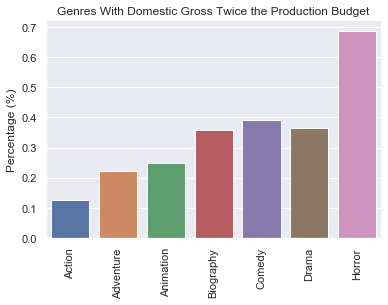

In [140]:
Y = dom_ls_2
X = ['Action','Adventure','Animation','Biography','Comedy','Drama','Horror']

sns.barplot(X, Y)
plt.title("Genres With Domestic Gross Twice the Production Budget")
plt.ylabel("Percentage (%)")
plt.xticks(rotation = 90)
plt.savefig('three_time_gross.png')
plt.show()

In [ ]:
thrice_df

In [132]:
action_3 = thrice_df.loc['Action'][True]
advent_3 = thrice_df.loc['Adventure'][True]
ani_3 = thrice_df.loc['Animation'][True]
bio_3 = thrice_df.loc['Biography'][True]
comedy_3 = thrice_df.loc['Comedy'][True]
drama_3 = thrice_df.loc['Drama'][True]
horror_3 = thrice_df.loc['Horror'][True]
ls = [action_3, advent_3, ani_3,bio_3,comedy_3,drama_3,horror_3]

In [133]:
dom_action_3 = dom_thrice_df.loc['Action'][True]
dom_advent_3 = dom_thrice_df.loc['Adventure'][True]
dom_ani_3 = dom_thrice_df.loc['Animation'][True]
dom_bio_3 = dom_thrice_df.loc['Biography'][True]
dom_comedy_3 = dom_thrice_df.loc['Comedy'][True]
dom_drama_3 = dom_thrice_df.loc['Drama'][True]
dom_horror_3 = dom_thrice_df.loc['Horror'][True]
dom_ls = [dom_action_3, dom_advent_3, dom_ani_3,dom_bio_3,dom_comedy_3,dom_drama_3,dom_horror_3]

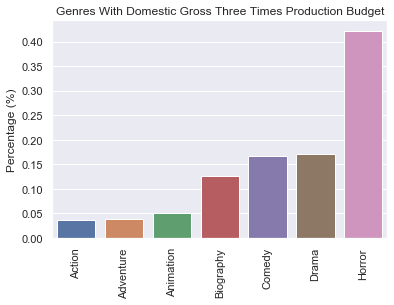

In [134]:
Y = dom_ls
X = ['Action','Adventure','Animation','Biography','Comedy','Drama','Horror']

sns.barplot(X, Y)
plt.title("Genres With Domestic Gross Three Times Production Budget")
plt.ylabel("Percentage (%)")
plt.xticks(rotation = 90)
plt.savefig('three_time_gross.png')
plt.show()


### See if there is a large gape with Action worldwide if we raise the bar in terms of worldwide gross vs production budget

First is 4x production budget

In [18]:
df['four_times']  = df['worldwide_gross'] >= 4 * df.production_budget

In [20]:
four_df = df.groupby(['new_genre']).four_times.value_counts(normalize = True)

In [23]:
action_4 = four_df.loc['Action'][True]
advent_4 = four_df.loc['Adventure'][True]
ani_4 = four_df.loc['Animation'][True]
bio_4 = four_df.loc['Biography'][True]
comedy_4 = four_df.loc['Comedy'][True]
drama_4 = four_df.loc['Drama'][True]
horror_4 = four_df.loc['Horror'][True]
ls_4_wld = [action_4, advent_4, ani_4,bio_4,comedy_4,drama_4,horror_4]

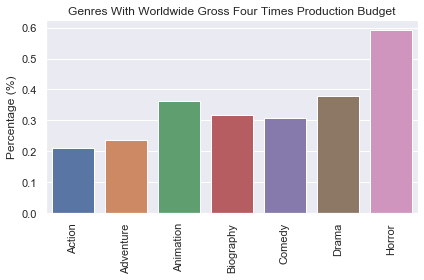

In [31]:
Y = ls_4_wld
X = ['Action','Adventure','Animation','Biography','Comedy','Drama','Horror']

sns.barplot(X, Y)
plt.title("Genres With Worldwide Gross Four Times Production Budget")
plt.ylabel("Percentage (%)")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.savefig("four_x_wld_gross.png")
plt.show()


####
Next is 5x

In [25]:
df['five_times']  = df['worldwide_gross'] >= 5 * df.production_budget

In [26]:
five_df = df.groupby(['new_genre']).five_times.value_counts(normalize = True)

In [27]:
action_5 = five_df.loc['Action'][True]
advent_5 = five_df.loc['Adventure'][True]
ani_5 = five_df.loc['Animation'][True]
bio_5 = five_df.loc['Biography'][True]
comedy_5 = five_df.loc['Comedy'][True]
drama_5 = five_df.loc['Drama'][True]
horror_5 = five_df.loc['Horror'][True]
ls_5_wld = [action_5, advent_5, ani_5,bio_5,comedy_5,drama_5,horror_5]

In [29]:
ani_5

0.2375

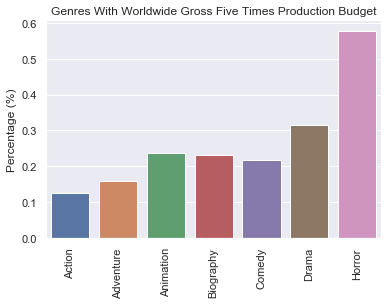

In [28]:
Y = ls_5_wld
X = ['Action','Adventure','Animation','Biography','Comedy','Drama','Horror']

sns.barplot(X, Y)
plt.title("Genres With Worldwide Gross Five Times Production Budget")
plt.ylabel("Percentage (%)")
plt.xticks(rotation = 90)

plt.show()

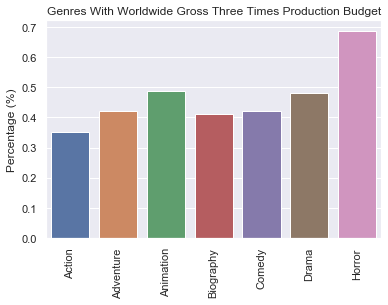

In [125]:
Y = ls
X = ['Action','Adventure','Animation','Biography','Comedy','Drama','Horror']

sns.barplot(X, Y)
plt.title("Genres With Worldwide Gross Three Times Production Budget")
plt.ylabel("Percentage (%)")
plt.xticks(rotation = 90)
plt.savefig('three_time_gross.png')
plt.show()

#fig_dims = (12, 6)
#fig, ax = plt.subplots(figsize=fig_dims)
#sns.barplot(x = "index", y = "ls", ax=ax, data=df)

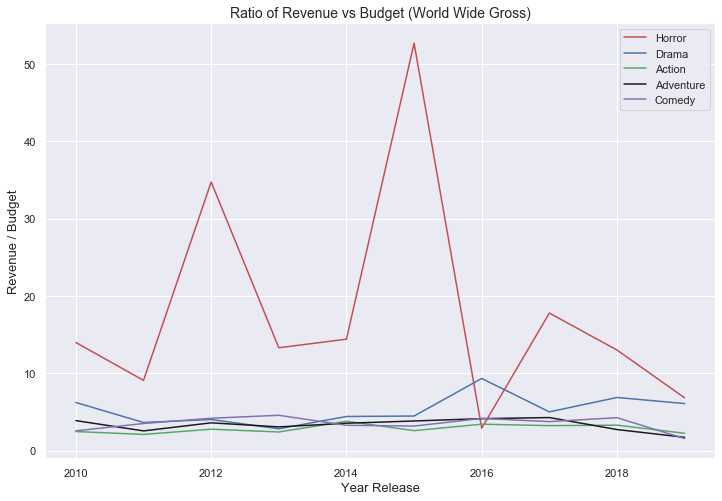

In [97]:

y1 = horror_df.groupby(['year'])['rev2bud_wld'].mean()
x1 = y1.index

y2 = drama_df.groupby(['year'])['rev2bud_wld'].mean()
x2 = y2.index

y3 = action_df.groupby(['year'])['rev2bud_wld'].mean()
x3 = y3.index

y4 = advent_df.groupby(['year'])['rev2bud_wld'].mean()
x4 = y4.index

y5 = comedy_df.groupby(['year'])['rev2bud_wld'].mean()
x5 = y5.index
plt.figure(figsize = (12,8))

plt.plot(x1, y1, 'r', label = 'Horror') # plotting Horror separately 
plt.plot(x2, y2, 'b', label = 'Drama') # plotting Drama separately 
plt.plot(x3, y3, 'g', label = 'Action') # plotting Action separately 
plt.plot(x4, y4, 'k', label = 'Adventure') # plotting adventure separately 
plt.plot(x5, y5, 'm', label = 'Comedy') # plotting comedy separately 


plt.legend()

plt.title('Ratio of Revenue vs Budget (World Wide Gross)', fontsize = 14)
plt.ylabel('Revenue / Budget', fontsize = 13)
plt.xlabel('Year Release', fontsize = 13)
plt.show()

### Make a bar plot for the rev2bud by genre chart

In [ ]:
revwld = df.groupby(['new_genre'])['rev2bud_wld'].mean()

In [149]:
dom_ls_2 = [revwld['Action'], revwld['Adventure'], revwld['Animation'],revwld['Biography'],revwld['Comedy'],revwld['Drama'],revwld['Horror']]

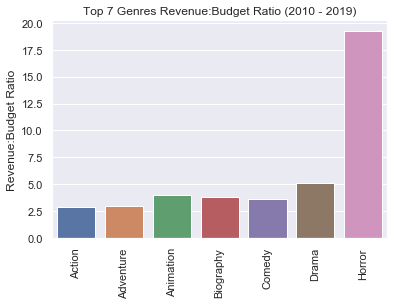

In [160]:
Y = dom_ls_2
X = ['Action','Adventure','Animation','Biography','Comedy','Drama','Horror']

sns.barplot(X, Y)
plt.title("Top 7 Genres Revenue:Budget Ratio (2010 - 2019)")
plt.ylabel("Revenue:Budget Ratio")
plt.xticks(rotation = 90)
plt.savefig('three_time_gross.png')
plt.show()

#### The overwhelming majority of animated movies are childrens movies

In [163]:
df[df['new_genre'] == 'Animation']['MPAA'].value_counts()

PG    65
G      9
R      2
Name: MPAA, dtype: int64

### Worldwide Gross with Animated Movies being included with top movies

In [255]:
dat = df[df.new_genre.apply(lambda x: x in ['Action', 'Comedy', 'Drama', 'Adventure', 'Biography', 'Horror', 'Animation'])]

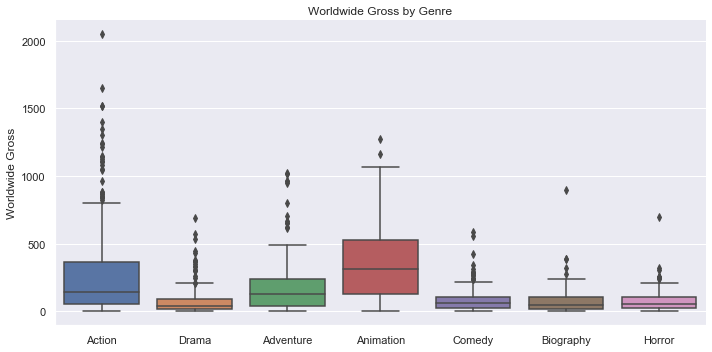

In [260]:
g = sns.catplot(x="new_genre", y="worldwide_gross", data=dat, kind = 'box', aspect = 2)
g.set(title = "Worldwide Gross by Genre", xlabel = "", ylabel = "Worldwide Gross")

plt.show()